<a href="https://colab.research.google.com/github/ocoropuj/PHYS434/blob/main/PHYS_434_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# 1. Estimating π

## Functions

In [2]:
def estimate_pi(N):
    i = 0
    X_in, Y_in = [], []
    X_out, Y_out = [], []

    for _ in range(N):
        x,y = np.random.random(2)*2-1
        if x**2 + y**2 <= 1:
            i += 1
            X_in.append(x)
            Y_in.append(y)
        else:
            X_out.append(x)
            Y_out.append(y)
    pi_estimate = 4*i/N
    return pi_estimate, X_in, Y_in, X_out, Y_out

In [3]:
def plot_circle(X_in, Y_in, X_out, Y_out, pi_estimate):
    # Create a scatter plot of the points
    plt.scatter(X_in, Y_in, color='lime', s=5, label='Points')
    plt.scatter(X_out, Y_out, color='red', s=5, label='Points')


    # Create a circle for the unit circle
    circle = plt.Circle((0, 0), 1, color='blue', fill=False, label='Unit Circle')

    # Add the circle to the plot
    plt.gca().add_patch(circle)

    # Set axis limits and labels
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('X')
    plt.ylabel('Y')

    # Add a legend with the π estimate
    plt.legend([f'π ≈ {pi_estimate:.4f}'], loc='upper right')

    # Display the plot
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

## N = 1,000

In [4]:
N = 1000
pi_estimate, X_in, Y_in, X_out, Y_out = estimate_pi(N)
print(f'π = {pi_estimate}')

π = 3.108


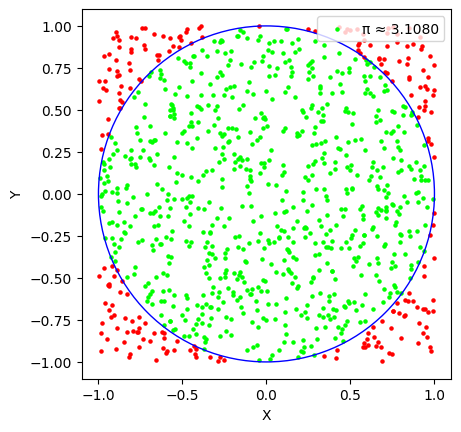

In [5]:
plot_circle(X_in, Y_in, X_out, Y_out, pi_estimate)

## N = 10,000

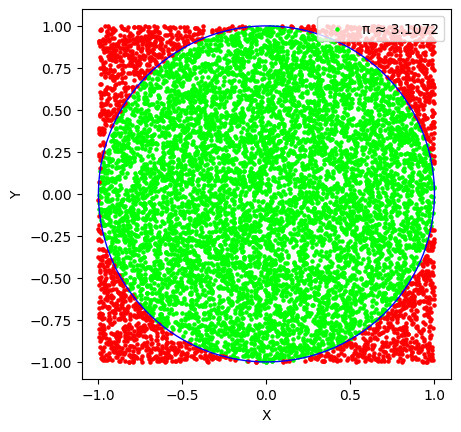

In [6]:
N2 = 10000
pi2_estimate, X2_in, Y2_in, X2_out, Y2_out = estimate_pi(N2)
plot_circle(X2_in, Y2_in, X2_out, Y2_out, pi2_estimate)

## N = 100,000

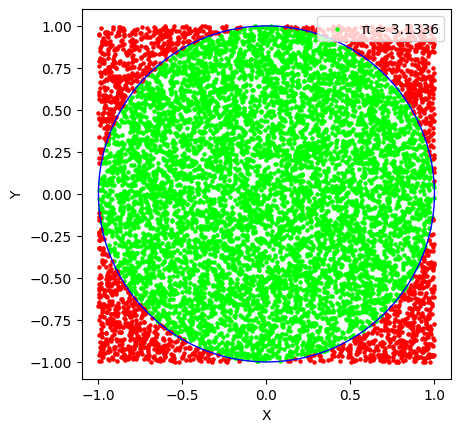

In [7]:
N3 = 10000
pi3_estimate, X3_in, Y3_in, X3_out, Y3_out = estimate_pi(N3)
plot_circle(X3_in, Y3_in, X3_out, Y3_out, pi3_estimate)

# 2. Parabola distribution

In [8]:
N = 10000
binwidth = 0.05

In [9]:
def f(x):
    return x**2

### a.

In [10]:
def generate_reject_f(N):
    rand_x = np.random.uniform(-1, 1, N)
    rand_y = np.random.uniform(0, 1, N)
    accept = (rand_y < f(rand_x)).astype(int)
    ac_rand_x = rand_x[accept == 1]
    return ac_rand_x

### b.
The $F(x) = k\int_{-1}^{x}x^2dx =\frac{k}{3}(x^3+1)$

Such that the: $F^{-1}(y)=\sqrt[3]{\frac{y-1}{k}}$

In [11]:
def inverse_f(y):
    # Inverse transformation function for the given x^3
    return np.cbrt((y))

def generate_inv_f(N):
    random_variables = np.empty(N)
    uniform_y = np.random.uniform(-1, 1, N)
    random_variables = inverse_f(uniform_y)

    return random_variables


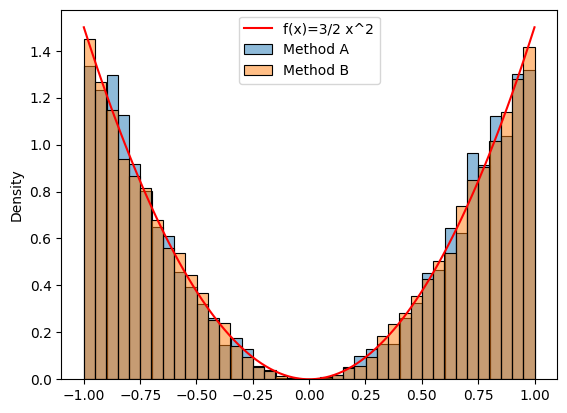

In [12]:
x = np.linspace(-1, 1, 100)
plt.plot(x, (3/2) * f(x), color='red', label='f(x)=3/2 x^2')


xb_i, xa_i = generate_inv_f(N),  generate_reject_f(N)

sns.histplot(xa_i,binwidth=binwidth, alpha=0.5, stat = 'density', label='Method A')
sns.histplot(xb_i,binwidth=binwidth, alpha=0.5, stat = 'density', label='Method B')

plt.legend()
plt.show()


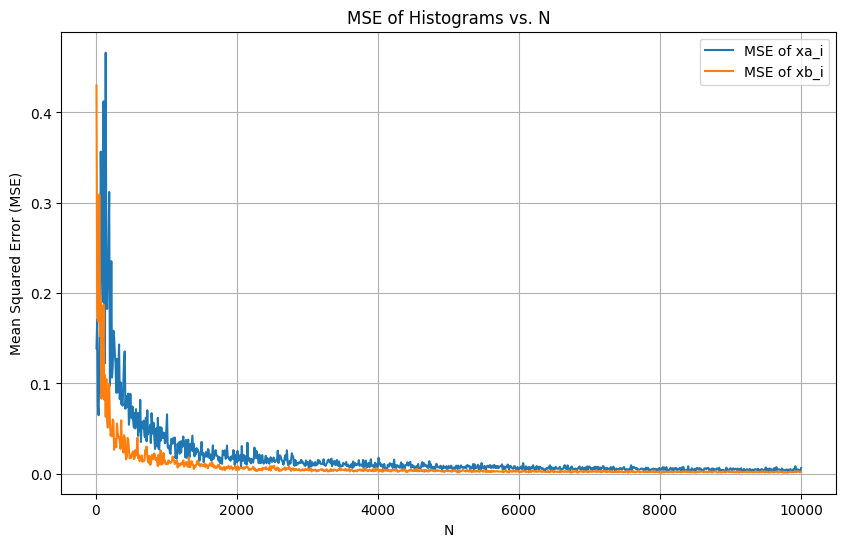

In [13]:
N_values = np.arange(10, 10001, 10)
max_bins=50

mse_xb = []
mse_xa = []

for N in N_values:
    xa_i = generate_reject_f(N)
    xb_i = generate_inv_f(N)
    NA = int(min(len(xa_i),max_bins))
    NB = int(min(N,max_bins))

    true_valuesA = 3/2 * f(np.linspace(-1, 1, NA))  # Generate true values with the same length as N
    true_valuesB = 3/2 * f(np.linspace(-1, 1, NB))  # Generate true values with the same length as N

    hist_xa, _ = np.histogram(xa_i, bins=NA, range=(-1, 1), density=True)
    hist_xb, _ = np.histogram(xb_i, bins=NB, range=(-1, 1), density=True)

    mse_xa.append(np.mean((hist_xa - true_valuesA) ** 2))
    mse_xb.append(np.mean((hist_xb - true_valuesB) ** 2))

plt.figure(figsize=(10, 6))
plt.plot(N_values, mse_xa, label='MSE of xa_i')
plt.plot(N_values, mse_xb, label='MSE of xb_i')
plt.xlabel('N')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('MSE of Histograms vs. N')
plt.grid()
plt.show()

We observe that the method B by inverting the $cdf(x)$ of the $pdf(x)$ is more efficient.

Given a random variable $X_a= \{x_{a1},x_{a2},...,x_{an}\}$ and $X_b= \{x_{b1},x_{b2},...,x_{bn}\}$ such that $\forall \epsilon > 0$:
  $$ ℙ(MSE(X_a,pdf(x))<\epsilon) < ℙ(MSE(X_b,pdf(x))<\epsilon) $$ We can guess that this implies that the convergence of $X_a \stackrel{c}{\rightarrow} pdf(x)$ is slower than $X_b \stackrel{c}{\rightarrow} pdf(x)$
